In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np

In [3]:
import torch

In [4]:
TRAIN_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/train_new.csv"
VALID_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/valid_new.csv"
TEST_DATASET_PATH = "/content/drive/MyDrive/FYP/Davidson_Sampling/test.csv"
# TRAIN_DATASET_PATH = "train_new.csv"
# VALID_DATASET_PATH = "valid_new.csv"
# TEST_DATASET_PATH = "test.csv"

In [5]:
train_dataset= pd.read_csv(TRAIN_DATASET_PATH)

In [6]:
train_dataset

,tweet,label
0,"""@RenegadeMo: Fat hoes get chose"" lol",1
1,That ho went from darkskinned to mulatto RT @F...,1
2,@NeoDaRegularGuy Oil? who said sumthin bout oi...,1
3,Wrote the absolute worst paper of my life last...,1
4,"I don't care how hot a bitch is, if her person...",1
...,...,...
15607,I love how hoes be like omg warped tour yayyyy...,1
15608,RT @saramariewelch: Been my main nigguh since ...,0
15609,Deez hoes be actin up..,1
15610,I'm sorry.. I'm sorry.. I can't fuc wit u no m...,1


In [7]:
# from sklearn.model_selection import train_test_split

In [8]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_dataset['tweet'], train_dataset["label"], test_size=0.3, random_state=42)

In [9]:
# X_valid

In [10]:
# y_valid

In [11]:
# features_df = pd.DataFrame(X_valid)
# labels_df = pd.DataFrame(y_valid)

# # Concatenate features and labels along columns axis
# combined_df = pd.concat([features_df, labels_df], axis=1)

In [12]:
# combined_df

In [13]:
# combined_df.to_csv('/content/drive/MyDrive/FYP/Davidson_Sampling/valid_new.csv', index=False)

In [14]:
test_dataset = pd.read_csv(TEST_DATASET_PATH)

In [15]:
valid_dataset = pd.read_csv(VALID_DATASET_PATH)

In [16]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModel.from_pretrained("roberta-base")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [18]:
model.to(device)
model.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [19]:
seq_len = [len(tweet.split()) for tweet in train_dataset['tweet']]

<Axes: >

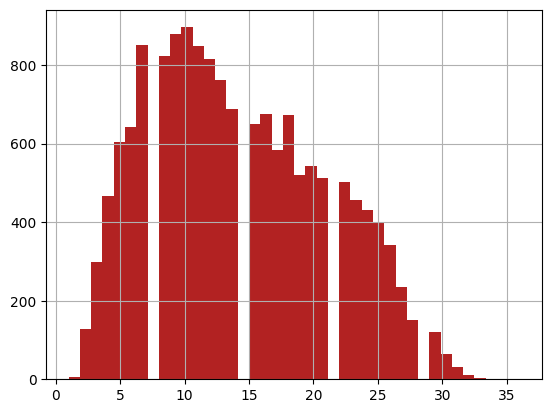

In [20]:
pd.Series(seq_len).hist(bins=40,color='firebrick')

In [21]:
MAX_LENGTH = 24

In [22]:
from torch.utils.data import DataLoader

In [23]:
train_dataset['tweet'].count()

15612

#Train

In [24]:
train_tokens= tokenizer.batch_encode_plus(train_dataset['tweet'].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [25]:
# import torch
# train_seq = torch.tensor(train_tokens['input_ids'])
# train_mask = torch.tensor(train_tokens['attention_mask'])
# train_y = torch.tensor(train_dataset['label'].tolist())

In [26]:
# tokenized_train_datasets=train_tokens.remove_columns(['text'])

In [27]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(train_tokens['input_ids'])
attention_masks = torch.tensor(train_tokens['attention_mask'])

# Create a TensorDataset
train_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
train_dataloader = DataLoader(train_new_dataset, batch_size=400, shuffle=False)

In [28]:
train_dataloader

In [29]:
# train_seq = torch.tensor(train_tokens['input_ids'])
# train_mask = torch.tensor(train_tokens['attention_mask'])
# train_y = torch.tensor(train_dataset['label'].tolist())

# test_seq = torch.tensor(test_tokens['input_ids'])
# test_mask = torch.tensor(test_tokens['attention_mask'])
# test_y = torch.tensor(test_dataset['label'].tolist())

In [30]:
all_outputs_train_tensor = torch.tensor([], device=device)

In [31]:
# for batch in train_dataloader:
#         print(batch)
#         batch = {k: v.to(device) for k, v in batch.items()}
#         with torch.no_grad():
#           outs = model(batch['input_ids'], token_type_ids=None, attention_mask=batch['attention_mask'])
#           bert_cls_hidden_state= outs[1]
#           print(bert_cls_hidden_state)
#           all_outputs_train_tensor = torch.cat([all_outputs_train_tensor, bert_cls_hidden_state], dim=0)


In [32]:
for batch in train_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_train_tensor = torch.cat([all_outputs_train_tensor, bert_cls_hidden_state], dim=0)


In [33]:
all_outputs_train_cpu = all_outputs_train_tensor.cpu()

In [34]:
all_outputs_train_numpy = all_outputs_train_cpu.numpy()

In [35]:
len(all_outputs_train_numpy)

15612

In [36]:
train_dataset['label'].count()

15612

In [37]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = train_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_df = pd.DataFrame(all_outputs_train_numpy)
labels_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_df = pd.concat([features_df, labels_df], axis=1)




In [38]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.107627,0.265680,0.134088,-0.331341,-0.017308,-0.054782,-0.224305,-0.364930,-0.068504,0.094310,...,-0.171639,0.090129,0.448509,0.137155,-0.136453,0.309544,-0.113031,0.153849,-0.169857,0.587134
1,-0.104551,0.267600,0.126412,-0.324078,-0.006053,-0.035264,-0.233430,-0.355360,-0.064811,0.097128,...,-0.175333,0.097617,0.439008,0.146887,-0.140215,0.303329,-0.120226,0.153990,-0.171619,0.588576
2,-0.116454,0.247128,0.147924,-0.326932,-0.015641,-0.050248,-0.236391,-0.370826,-0.088099,0.080094,...,-0.182228,0.091504,0.452414,0.152940,-0.148456,0.313092,-0.124314,0.137117,-0.166078,0.615903
3,-0.081328,0.253255,0.141245,-0.288774,-0.005957,-0.031798,-0.222701,-0.346449,-0.090180,0.077138,...,-0.167158,0.083321,0.436621,0.139400,-0.139704,0.305512,-0.128640,0.136555,-0.176949,0.590137
4,-0.106898,0.256000,0.158463,-0.349611,0.024646,-0.054574,-0.238549,-0.356911,-0.071476,0.121951,...,-0.197355,0.102737,0.438013,0.111632,-0.185588,0.323431,-0.124730,0.151101,-0.139798,0.628764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15607,-0.112047,0.266857,0.144864,-0.294159,-0.014650,-0.044451,-0.190281,-0.316228,-0.079881,0.074135,...,-0.157464,0.076334,0.429016,0.137612,-0.134644,0.309025,-0.128952,0.144862,-0.175768,0.596929
15608,-0.095828,0.277039,0.119916,-0.337243,-0.005842,-0.051080,-0.224959,-0.351290,-0.064038,0.100593,...,-0.158351,0.102147,0.440555,0.120282,-0.153034,0.305680,-0.129773,0.156134,-0.164530,0.584345
15609,-0.104949,0.260298,0.151964,-0.326730,-0.010406,-0.037125,-0.234164,-0.358978,-0.082543,0.069536,...,-0.177731,0.117154,0.440447,0.146509,-0.139425,0.298256,-0.121811,0.155155,-0.158776,0.582047
15610,-0.098327,0.253165,0.149069,-0.310328,0.014363,-0.026060,-0.206578,-0.324371,-0.078604,0.067110,...,-0.143486,0.088727,0.442163,0.119664,-0.120721,0.312659,-0.130759,0.165634,-0.166233,0.585339


In [39]:
len(all_outputs_train_numpy)

15612

In [40]:
combined_df


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.107627,0.265680,0.134088,-0.331341,-0.017308,-0.054782,-0.224305,-0.364930,-0.068504,0.094310,...,0.090129,0.448509,0.137155,-0.136453,0.309544,-0.113031,0.153849,-0.169857,0.587134,1
1,-0.104551,0.267600,0.126412,-0.324078,-0.006053,-0.035264,-0.233430,-0.355360,-0.064811,0.097128,...,0.097617,0.439008,0.146887,-0.140215,0.303329,-0.120226,0.153990,-0.171619,0.588576,1
2,-0.116454,0.247128,0.147924,-0.326932,-0.015641,-0.050248,-0.236391,-0.370826,-0.088099,0.080094,...,0.091504,0.452414,0.152940,-0.148456,0.313092,-0.124314,0.137117,-0.166078,0.615903,1
3,-0.081328,0.253255,0.141245,-0.288774,-0.005957,-0.031798,-0.222701,-0.346449,-0.090180,0.077138,...,0.083321,0.436621,0.139400,-0.139704,0.305512,-0.128640,0.136555,-0.176949,0.590137,1
4,-0.106898,0.256000,0.158463,-0.349611,0.024646,-0.054574,-0.238549,-0.356911,-0.071476,0.121951,...,0.102737,0.438013,0.111632,-0.185588,0.323431,-0.124730,0.151101,-0.139798,0.628764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15607,-0.112047,0.266857,0.144864,-0.294159,-0.014650,-0.044451,-0.190281,-0.316228,-0.079881,0.074135,...,0.076334,0.429016,0.137612,-0.134644,0.309025,-0.128952,0.144862,-0.175768,0.596929,1
15608,-0.095828,0.277039,0.119916,-0.337243,-0.005842,-0.051080,-0.224959,-0.351290,-0.064038,0.100593,...,0.102147,0.440555,0.120282,-0.153034,0.305680,-0.129773,0.156134,-0.164530,0.584345,0
15609,-0.104949,0.260298,0.151964,-0.326730,-0.010406,-0.037125,-0.234164,-0.358978,-0.082543,0.069536,...,0.117154,0.440447,0.146509,-0.139425,0.298256,-0.121811,0.155155,-0.158776,0.582047,1
15610,-0.098327,0.253165,0.149069,-0.310328,0.014363,-0.026060,-0.206578,-0.324371,-0.078604,0.067110,...,0.088727,0.442163,0.119664,-0.120721,0.312659,-0.130759,0.165634,-0.166233,0.585339,1


#Test

In [41]:
test_tokens = tokenizer.batch_encode_plus(test_dataset['tweet'].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [42]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(test_tokens['input_ids'])
attention_masks = torch.tensor(test_tokens['attention_mask'])

# Create a TensorDataset
test_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
test_dataloader = DataLoader(test_new_dataset, batch_size=400, shuffle=False)

In [43]:
all_outputs_test_tensor = torch.tensor([], device=device)

In [44]:
# for batch in test_dataloader:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         with torch.no_grad():
#           outs = model(batch['input_ids'], token_type_ids=None, attention_mask=batch['attention_mask'])
#           b_logit_pred = outs.logits

#           pred_label = torch.sigmoid(b_logit_pred)

#           all_outputs_test_tensor = torch.cat([all_outputs_test_tensor, pred_label], dim=0)
#           print(all_outputs_test_tensor)

In [45]:
for batch in test_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_test_tensor = torch.cat([all_outputs_test_tensor, bert_cls_hidden_state], dim=0)


In [46]:
all_outputs_test_cpu = all_outputs_test_tensor.cpu()

In [47]:
all_outputs_test_numpy = all_outputs_test_cpu.numpy()

In [48]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = test_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_test_df = pd.DataFrame(all_outputs_test_numpy)
labels_test_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_test_df = pd.concat([features_test_df, labels_test_df], axis=1)




In [49]:
combined_test_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.097173,0.275473,0.129169,-0.319481,0.003274,-0.065748,-0.212113,-0.349450,-0.083235,0.092760,...,0.110331,0.452459,0.142686,-0.135943,0.314199,-0.118347,0.136994,-0.170416,0.591100,1
1,-0.095761,0.255076,0.137402,-0.338080,0.005194,-0.050684,-0.219124,-0.349761,-0.085039,0.089906,...,0.103201,0.442598,0.150489,-0.144596,0.313348,-0.124211,0.148629,-0.163125,0.590626,1
2,-0.102155,0.272924,0.139401,-0.326888,-0.006737,-0.035858,-0.216068,-0.355180,-0.076918,0.088301,...,0.100910,0.435030,0.140482,-0.137296,0.303573,-0.130552,0.150486,-0.167681,0.581956,2
3,-0.084773,0.257652,0.131147,-0.311966,-0.007910,-0.038400,-0.206752,-0.351726,-0.073588,0.097079,...,0.103850,0.442478,0.154610,-0.143277,0.310100,-0.141929,0.152412,-0.160354,0.591097,1
4,-0.080364,0.252923,0.132791,-0.304412,-0.025481,-0.037973,-0.197352,-0.358407,-0.086325,0.082360,...,0.114750,0.450478,0.147400,-0.131096,0.314911,-0.143624,0.142886,-0.158006,0.577328,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,-0.101116,0.265127,0.126196,-0.314057,-0.028100,-0.037040,-0.223108,-0.362804,-0.073091,0.106157,...,0.105433,0.437373,0.146945,-0.153998,0.305411,-0.116162,0.145409,-0.177796,0.574670,1
2475,-0.102460,0.276689,0.106426,-0.360489,0.022703,-0.065912,-0.236008,-0.351398,-0.080053,0.121930,...,0.102335,0.431512,0.122200,-0.168552,0.314399,-0.120123,0.145113,-0.150868,0.607922,2
2476,-0.108934,0.276210,0.167490,-0.374889,0.004839,-0.052805,-0.248283,-0.373711,-0.092059,0.126039,...,0.116939,0.421660,0.128197,-0.192185,0.304315,-0.102620,0.142610,-0.150876,0.618091,1
2477,-0.094895,0.248653,0.135994,-0.326954,-0.007424,-0.037052,-0.220682,-0.354663,-0.076413,0.100642,...,0.088579,0.427449,0.146585,-0.148111,0.305307,-0.133487,0.144373,-0.148966,0.592267,2


In [50]:
# with torch.no_grad():
#     train_outputs = model(input_ids=train_seq, attention_mask=train_mask)

# # Extract the embeddings from the BERT model
# train_embeddings = train_outputs.last_hidden_state[:, 0, :].numpy()

In [51]:
x_train_features = combined_df.iloc[:, :-1]
y_train_lables = combined_df['label']

In [52]:
x_test_features = combined_test_df.iloc[:, :-1]
y_test_lables = combined_test_df['label']

#Valid

In [53]:
valid_tokens = tokenizer.batch_encode_plus(valid_dataset['tweet'].tolist(),padding='max_length',max_length=MAX_LENGTH,truncation=True)

In [54]:
# tokenized_train_datasets=t.with_format("torch")
from torch.utils.data import TensorDataset

# Assuming train_tokens contains the tokenized and encoded inputs
input_ids = torch.tensor(valid_tokens['input_ids'])
attention_masks = torch.tensor(valid_tokens['attention_mask'])

# Create a TensorDataset
valid_new_dataset = TensorDataset(input_ids, attention_masks)

# Use the DataLoader with the TensorDataset
valid_dataloader = DataLoader(valid_new_dataset, batch_size=400, shuffle=False)

In [55]:
all_outputs_valid_tensor = torch.tensor([], device=device)

In [56]:
for batch in valid_dataloader:
    input_ids, attention_masks = batch
    input_ids = input_ids.to(device)
    attention_masks = attention_masks.to(device)

    with torch.no_grad():
        outs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
        bert_cls_hidden_state = outs[1]
        all_outputs_valid_tensor = torch.cat([all_outputs_valid_tensor, bert_cls_hidden_state], dim=0)


In [57]:
all_outputs_valid_cpu = all_outputs_valid_tensor.cpu()

In [58]:
all_outputs_valid_numpy = all_outputs_valid_cpu.numpy()

In [59]:
import pandas as pd

# Assuming train_dataset['label'] is a numpy array
labels = valid_dataset['label']

# Convert numpy arrays to pandas DataFrames
features_valid_df = pd.DataFrame(all_outputs_valid_numpy)
labels_valid_df = pd.DataFrame(labels)

# Concatenate features and labels along columns axis
combined_valid_df = pd.concat([features_valid_df, labels_valid_df], axis=1)




In [60]:
combined_valid_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.097161,0.251691,0.131848,-0.314382,-0.012212,-0.044508,-0.186984,-0.356566,-0.090494,0.086559,...,0.095070,0.449353,0.140079,-0.135494,0.310301,-0.129260,0.136756,-0.149460,0.579526,2
1,-0.093481,0.257719,0.134014,-0.316513,-0.007188,-0.047354,-0.223481,-0.347458,-0.077449,0.089140,...,0.092391,0.446862,0.142880,-0.138083,0.315382,-0.137779,0.133435,-0.179448,0.587318,1
2,-0.098034,0.259097,0.089858,-0.322135,0.003586,-0.068465,-0.227067,-0.371329,-0.086333,0.128238,...,0.103923,0.439592,0.140379,-0.180981,0.309064,-0.138975,0.148859,-0.125686,0.616149,0
3,-0.071238,0.236577,0.129581,-0.312547,-0.004432,-0.055618,-0.217848,-0.370531,-0.077443,0.108084,...,0.104152,0.451038,0.148512,-0.143185,0.311325,-0.138217,0.144339,-0.164803,0.593526,1
4,-0.104804,0.257463,0.134707,-0.331491,-0.000225,-0.032767,-0.231433,-0.346080,-0.084332,0.077605,...,0.102086,0.454715,0.129907,-0.135195,0.318274,-0.135726,0.135053,-0.179342,0.593455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,-0.083859,0.250036,0.132722,-0.301531,-0.013676,-0.035994,-0.195963,-0.365357,-0.064901,0.088259,...,0.105083,0.439852,0.139586,-0.152328,0.312333,-0.135140,0.156579,-0.163699,0.588280,1
6688,-0.086630,0.253419,0.130719,-0.322275,-0.013673,-0.043533,-0.217925,-0.333283,-0.078993,0.092025,...,0.087708,0.453791,0.125302,-0.141728,0.322242,-0.132880,0.139029,-0.159181,0.580633,1
6689,-0.100770,0.262808,0.137811,-0.321171,-0.004571,-0.050287,-0.204761,-0.357416,-0.065530,0.097818,...,0.108584,0.436731,0.138847,-0.141478,0.300133,-0.118191,0.151682,-0.158597,0.592945,0
6690,-0.101371,0.258981,0.127053,-0.328470,0.000500,-0.061299,-0.218131,-0.361561,-0.078831,0.102967,...,0.086957,0.444204,0.131105,-0.141993,0.312262,-0.139207,0.138494,-0.176827,0.585648,2


In [61]:
x_valid_features = combined_valid_df.iloc[:, :-1]
y_valid_lables = combined_valid_df['label']

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [63]:
def score(y_test_lables,y_pred):
  accuracy = accuracy_score(y_test_lables, y_pred)
  precision = precision_score(y_test_lables, y_pred,average='macro')
  recall = recall_score(y_test_lables, y_pred,average='macro')
  f1 = f1_score(y_test_lables, y_pred,average='macro')
  conf_matrix = confusion_matrix(y_test_lables, y_pred)
  return accuracy,precision,recall,f1,conf_matrix

#LogisticRegression

In [64]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# logistic_regression = LogisticRegression()
# param_grid = {
#     'C': [0.001, 0.01, 0.1],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear','saga']
# }

# grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# grid_search.fit(x_valid_features, y_valid_lables)

# print("Best Parameters:", grid_search.best_params_)

In [65]:
# y_pred = grid_search.predict(x_test_features)


In [66]:
# accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

In [67]:
# print(f1)
# print(accuracy)
# print(recall)
# print(precision)
# print(conf_matrix)

#XGBoost

In [68]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_valid_features, y_valid_lables)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7}


In [69]:
y_pred = grid_search.predict(x_test_features)

In [70]:
accuracy,precision,recall,f1,conf_matrix = score(y_test_lables,y_pred)

In [71]:
print(f1)
print(accuracy)
print(recall)
print(precision)
print(conf_matrix)

0.4908913652711833
0.8188785800726099
0.4775942641316177
0.6483326494607795
[[   2  148   14]
 [   2 1842   61]
 [   1  223  186]]


#KNN

In [72]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()

# # Define hyperparameters to tune
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(x_valid_features, y_valid_lables)

# print("Best Parameters:", grid_search.best_params_)


In [73]:
# y_pred = grid_search.predict(x_test_features)

In [74]:
# accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

In [75]:
# print(f1)
# print(accuracy)
# print(recall)
# print(precision)
# print(conf_matrix)

#SVC

In [76]:
# #Hyper Parameter Tuning For SVC
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
# # param_grid = {'C': [0.1, 1, 10],
# #              'gamma': [1, 0.1, 0.01],
# #              'kernel': ['rbf']}

# grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3)

# # fitting the model for grid search
# grid.fit(x_valid_features, y_valid_lables)
# grid.best_params_


In [77]:
# y_pred = grid.predict(x_test_features)

In [78]:
# accuracy,precision,recall,f1,conf_matrix = score (y_test_lables,y_pred)

In [79]:
# print(f1)
# print(accuracy)
# print(recall)
# print(precision)
# print(conf_matrix)